## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  99.595514   733.855934  0.220338   2.801133  1.004522
1  59.955341  1136.815632  0.589003   5.886218  1.410156
2  18.807008  1448.777772  0.310617   4.783618  1.689725
3  47.752264   686.980829  0.350559   7.766560  1.515951
4  62.078298  1079.876386  0.797997  10.318245  1.663902


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.8185320	total: 64.2ms	remaining: 1m 4s
1:	learn: 0.8118567	total: 64.8ms	remaining: 32.3s
2:	learn: 0.8034778	total: 65.3ms	remaining: 21.7s
3:	learn: 0.7975223	total: 65.9ms	remaining: 16.4s
4:	learn: 0.7895686	total: 66.3ms	remaining: 13.2s
5:	learn: 0.7822064	total: 66.8ms	remaining: 11.1s
6:	learn: 0.7746450	total: 67.3ms	remaining: 9.55s
7:	learn: 0.7678384	total: 68.1ms	remaining: 8.44s
8:	learn: 0.7618212	total: 69.3ms	remaining: 7.63s


9:	learn: 0.7564242	total: 70.1ms	remaining: 6.94s
10:	learn: 0.7494686	total: 71.4ms	remaining: 6.42s
11:	learn: 0.7423600	total: 71.9ms	remaining: 5.92s
12:	learn: 0.7358512	total: 72.4ms	remaining: 5.5s
13:	learn: 0.7304382	total: 72.8ms	remaining: 5.13s
14:	learn: 0.7244040	total: 73.7ms	remaining: 4.84s
15:	learn: 0.7177498	total: 74.3ms	remaining: 4.57s
16:	learn: 0.7123263	total: 74.8ms	remaining: 4.32s
17:	learn: 0.7075806	total: 75.4ms	remaining: 4.11s
18:	learn: 0.7013362	total: 75.9ms	remaining: 3.92s
19:	learn: 0.6955442	total: 76.4ms	remaining: 3.74s
20:	learn: 0.6895318	total: 77ms	remaining: 3.59s
21:	learn: 0.6837078	total: 77.3ms	remaining: 3.44s
22:	learn: 0.6769653	total: 77.8ms	remaining: 3.31s
23:	learn: 0.6716421	total: 78.3ms	remaining: 3.19s
24:	learn: 0.6656744	total: 78.9ms	remaining: 3.08s
25:	learn: 0.6599632	total: 79.5ms	remaining: 2.98s
26:	learn: 0.6552679	total: 80ms	remaining: 2.88s
27:	learn: 0.6498318	total: 80.4ms	remaining: 2.79s
28:	learn: 0.64533

154:	learn: 0.3113088	total: 154ms	remaining: 838ms
155:	learn: 0.3099551	total: 155ms	remaining: 837ms
156:	learn: 0.3084364	total: 155ms	remaining: 834ms
157:	learn: 0.3071446	total: 156ms	remaining: 831ms
158:	learn: 0.3056237	total: 157ms	remaining: 829ms
159:	learn: 0.3040465	total: 157ms	remaining: 825ms
160:	learn: 0.3025664	total: 158ms	remaining: 823ms
161:	learn: 0.3010041	total: 158ms	remaining: 820ms
162:	learn: 0.2994769	total: 159ms	remaining: 818ms
163:	learn: 0.2983753	total: 160ms	remaining: 814ms
164:	learn: 0.2970607	total: 160ms	remaining: 810ms
165:	learn: 0.2953978	total: 161ms	remaining: 809ms
166:	learn: 0.2941746	total: 162ms	remaining: 806ms
167:	learn: 0.2931435	total: 162ms	remaining: 803ms
168:	learn: 0.2916712	total: 163ms	remaining: 799ms
169:	learn: 0.2905063	total: 163ms	remaining: 797ms
170:	learn: 0.2892226	total: 164ms	remaining: 794ms
171:	learn: 0.2880108	total: 164ms	remaining: 791ms
172:	learn: 0.2866224	total: 165ms	remaining: 789ms
173:	learn: 

198:	learn: 0.2564873	total: 277ms	remaining: 1.11s
199:	learn: 0.2554027	total: 277ms	remaining: 1.11s
200:	learn: 0.2543473	total: 302ms	remaining: 1.2s
201:	learn: 0.2535669	total: 303ms	remaining: 1.2s
202:	learn: 0.2524470	total: 304ms	remaining: 1.19s
203:	learn: 0.2513845	total: 305ms	remaining: 1.19s
204:	learn: 0.2501650	total: 306ms	remaining: 1.19s
205:	learn: 0.2491369	total: 308ms	remaining: 1.19s
206:	learn: 0.2483365	total: 309ms	remaining: 1.19s
207:	learn: 0.2471669	total: 311ms	remaining: 1.18s
208:	learn: 0.2459045	total: 312ms	remaining: 1.18s
209:	learn: 0.2447146	total: 313ms	remaining: 1.18s
210:	learn: 0.2433092	total: 314ms	remaining: 1.17s
211:	learn: 0.2422900	total: 315ms	remaining: 1.17s
212:	learn: 0.2412959	total: 315ms	remaining: 1.17s
213:	learn: 0.2399172	total: 316ms	remaining: 1.16s
214:	learn: 0.2385550	total: 317ms	remaining: 1.16s
215:	learn: 0.2373783	total: 319ms	remaining: 1.16s
216:	learn: 0.2362121	total: 320ms	remaining: 1.15s
217:	learn: 0.

219:	learn: 0.2327835	total: 324ms	remaining: 1.15s
220:	learn: 0.2321794	total: 324ms	remaining: 1.14s
221:	learn: 0.2309397	total: 325ms	remaining: 1.14s
222:	learn: 0.2296732	total: 326ms	remaining: 1.14s
223:	learn: 0.2284580	total: 328ms	remaining: 1.14s
224:	learn: 0.2273642	total: 330ms	remaining: 1.14s
225:	learn: 0.2258314	total: 331ms	remaining: 1.14s
226:	learn: 0.2248377	total: 332ms	remaining: 1.13s
227:	learn: 0.2235026	total: 334ms	remaining: 1.13s
228:	learn: 0.2224083	total: 335ms	remaining: 1.13s
229:	learn: 0.2214750	total: 337ms	remaining: 1.13s
230:	learn: 0.2207865	total: 338ms	remaining: 1.12s
231:	learn: 0.2196473	total: 339ms	remaining: 1.12s
232:	learn: 0.2192498	total: 340ms	remaining: 1.12s
233:	learn: 0.2182430	total: 341ms	remaining: 1.11s
234:	learn: 0.2174263	total: 341ms	remaining: 1.11s
235:	learn: 0.2168152	total: 342ms	remaining: 1.1s
236:	learn: 0.2156687	total: 342ms	remaining: 1.1s
237:	learn: 0.2146370	total: 342ms	remaining: 1.1s
238:	learn: 0.2

403:	learn: 0.1224209	total: 413ms	remaining: 609ms
404:	learn: 0.1221883	total: 413ms	remaining: 607ms
405:	learn: 0.1218276	total: 413ms	remaining: 605ms
406:	learn: 0.1215568	total: 414ms	remaining: 603ms
407:	learn: 0.1209924	total: 414ms	remaining: 601ms
408:	learn: 0.1207289	total: 415ms	remaining: 599ms
409:	learn: 0.1203746	total: 415ms	remaining: 597ms
410:	learn: 0.1201170	total: 415ms	remaining: 595ms
411:	learn: 0.1199448	total: 416ms	remaining: 593ms
412:	learn: 0.1192710	total: 416ms	remaining: 592ms
413:	learn: 0.1191010	total: 417ms	remaining: 590ms
414:	learn: 0.1187541	total: 417ms	remaining: 588ms
415:	learn: 0.1185029	total: 417ms	remaining: 586ms
416:	learn: 0.1182562	total: 418ms	remaining: 585ms
417:	learn: 0.1180292	total: 419ms	remaining: 583ms
418:	learn: 0.1176514	total: 419ms	remaining: 581ms
419:	learn: 0.1173148	total: 420ms	remaining: 579ms
420:	learn: 0.1170648	total: 420ms	remaining: 578ms
421:	learn: 0.1168265	total: 420ms	remaining: 576ms
422:	learn: 

463:	learn: 0.1043603	total: 439ms	remaining: 507ms
464:	learn: 0.1038108	total: 440ms	remaining: 506ms
465:	learn: 0.1036428	total: 440ms	remaining: 504ms
466:	learn: 0.1034773	total: 440ms	remaining: 503ms
467:	learn: 0.1032048	total: 441ms	remaining: 501ms
468:	learn: 0.1026942	total: 441ms	remaining: 500ms
469:	learn: 0.1025162	total: 442ms	remaining: 498ms
470:	learn: 0.1023759	total: 442ms	remaining: 496ms
471:	learn: 0.1018414	total: 442ms	remaining: 495ms
472:	learn: 0.1016806	total: 443ms	remaining: 493ms
473:	learn: 0.1015432	total: 443ms	remaining: 492ms
474:	learn: 0.1012758	total: 444ms	remaining: 491ms
475:	learn: 0.1011578	total: 444ms	remaining: 489ms
476:	learn: 0.1006674	total: 445ms	remaining: 488ms
477:	learn: 0.1005324	total: 446ms	remaining: 487ms
478:	learn: 0.1001491	total: 446ms	remaining: 485ms
479:	learn: 0.0999768	total: 447ms	remaining: 484ms
480:	learn: 0.0998430	total: 447ms	remaining: 482ms
481:	learn: 0.0997569	total: 448ms	remaining: 481ms
482:	learn: 

670:	learn: 0.0635287	total: 530ms	remaining: 260ms
671:	learn: 0.0634692	total: 531ms	remaining: 259ms
672:	learn: 0.0631777	total: 531ms	remaining: 258ms
673:	learn: 0.0631285	total: 532ms	remaining: 257ms
674:	learn: 0.0630699	total: 532ms	remaining: 256ms
675:	learn: 0.0628766	total: 533ms	remaining: 255ms


676:	learn: 0.0626831	total: 538ms	remaining: 257ms
677:	learn: 0.0626346	total: 538ms	remaining: 256ms
678:	learn: 0.0624288	total: 539ms	remaining: 255ms
679:	learn: 0.0623715	total: 539ms	remaining: 254ms
680:	learn: 0.0622835	total: 539ms	remaining: 253ms
681:	learn: 0.0620954	total: 540ms	remaining: 252ms
682:	learn: 0.0620087	total: 541ms	remaining: 251ms
683:	learn: 0.0618995	total: 541ms	remaining: 250ms
684:	learn: 0.0618442	total: 542ms	remaining: 249ms
685:	learn: 0.0616122	total: 542ms	remaining: 248ms
686:	learn: 0.0615653	total: 542ms	remaining: 247ms
687:	learn: 0.0614455	total: 543ms	remaining: 246ms
688:	learn: 0.0614045	total: 543ms	remaining: 245ms
689:	learn: 0.0613581	total: 543ms	remaining: 244ms
690:	learn: 0.0612737	total: 544ms	remaining: 243ms
691:	learn: 0.0612344	total: 544ms	remaining: 242ms
692:	learn: 0.0610184	total: 545ms	remaining: 241ms
693:	learn: 0.0607089	total: 545ms	remaining: 240ms
694:	learn: 0.0605280	total: 545ms	remaining: 239ms
695:	learn: 

843:	learn: 0.0423951	total: 606ms	remaining: 112ms
844:	learn: 0.0422974	total: 607ms	remaining: 111ms
845:	learn: 0.0420927	total: 607ms	remaining: 111ms
846:	learn: 0.0420118	total: 608ms	remaining: 110ms
847:	learn: 0.0419888	total: 608ms	remaining: 109ms
848:	learn: 0.0418489	total: 609ms	remaining: 108ms
849:	learn: 0.0416785	total: 609ms	remaining: 108ms
850:	learn: 0.0416245	total: 625ms	remaining: 110ms


851:	learn: 0.0414425	total: 633ms	remaining: 110ms
852:	learn: 0.0414034	total: 640ms	remaining: 110ms
853:	learn: 0.0413080	total: 644ms	remaining: 110ms
854:	learn: 0.0412293	total: 645ms	remaining: 109ms
855:	learn: 0.0411908	total: 655ms	remaining: 110ms
856:	learn: 0.0410039	total: 663ms	remaining: 111ms
857:	learn: 0.0409659	total: 664ms	remaining: 110ms
858:	learn: 0.0409284	total: 665ms	remaining: 109ms
859:	learn: 0.0407635	total: 665ms	remaining: 108ms
860:	learn: 0.0407105	total: 666ms	remaining: 107ms
861:	learn: 0.0406738	total: 666ms	remaining: 107ms
862:	learn: 0.0406375	total: 673ms	remaining: 107ms
863:	learn: 0.0404557	total: 673ms	remaining: 106ms
864:	learn: 0.0404125	total: 674ms	remaining: 105ms
865:	learn: 0.0402516	total: 674ms	remaining: 104ms
866:	learn: 0.0401989	total: 675ms	remaining: 104ms
867:	learn: 0.0401567	total: 676ms	remaining: 103ms
868:	learn: 0.0399845	total: 682ms	remaining: 103ms
869:	learn: 0.0399328	total: 683ms	remaining: 102ms
870:	learn: 

938:	learn: 0.0347291	total: 738ms	remaining: 47.9ms
939:	learn: 0.0346660	total: 741ms	remaining: 47.3ms
940:	learn: 0.0346237	total: 742ms	remaining: 46.5ms
941:	learn: 0.0345509	total: 742ms	remaining: 45.7ms
942:	learn: 0.0345090	total: 743ms	remaining: 44.9ms
943:	learn: 0.0344890	total: 743ms	remaining: 44.1ms
944:	learn: 0.0343357	total: 746ms	remaining: 43.4ms
945:	learn: 0.0342011	total: 746ms	remaining: 42.6ms
946:	learn: 0.0340741	total: 747ms	remaining: 41.8ms
947:	learn: 0.0339347	total: 747ms	remaining: 41ms
948:	learn: 0.0339156	total: 747ms	remaining: 40.2ms
949:	learn: 0.0337809	total: 748ms	remaining: 39.4ms
950:	learn: 0.0337400	total: 749ms	remaining: 38.6ms
951:	learn: 0.0336169	total: 750ms	remaining: 37.8ms
952:	learn: 0.0335767	total: 750ms	remaining: 37ms
953:	learn: 0.0335582	total: 751ms	remaining: 36.2ms
954:	learn: 0.0334833	total: 751ms	remaining: 35.4ms
955:	learn: 0.0334386	total: 751ms	remaining: 34.6ms
956:	learn: 0.0334204	total: 752ms	remaining: 33.8

999:	learn: 0.0310191	total: 799ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.7490348676523733


ABC Pre-generator MAE 1.2810960328024277


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

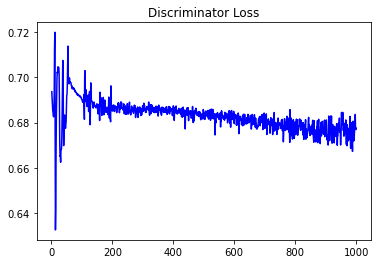

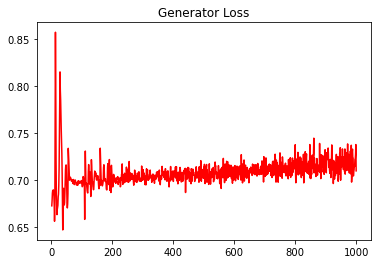

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.7025046987934038


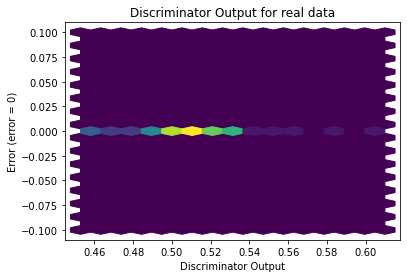

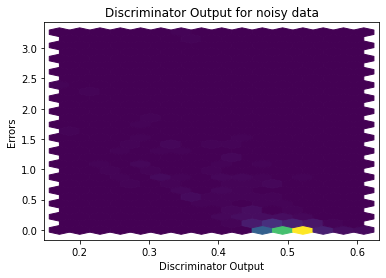

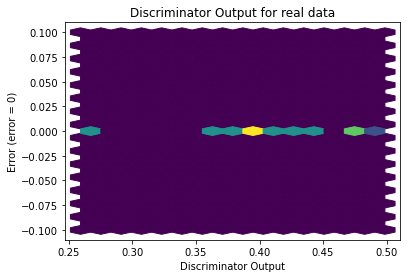

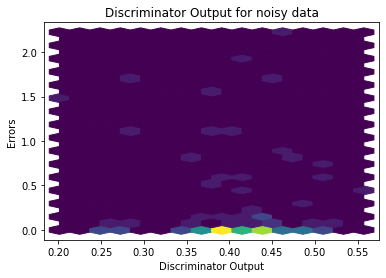

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

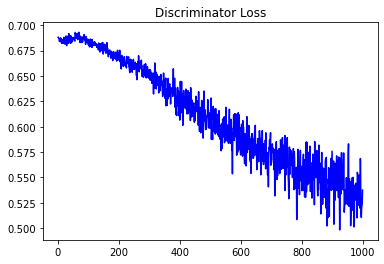

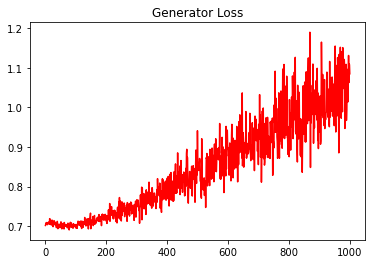

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.9758231281414628


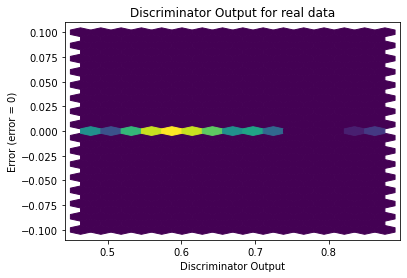

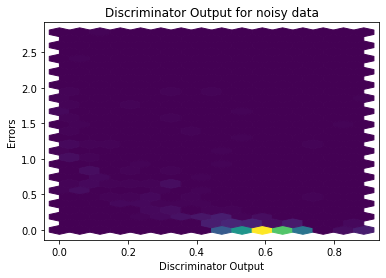

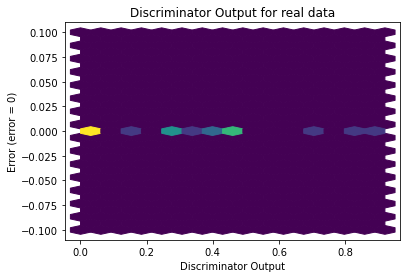

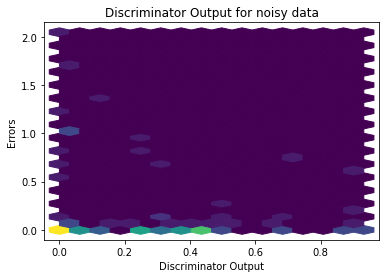

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


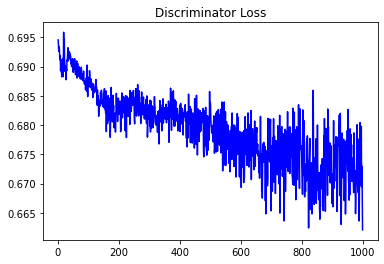

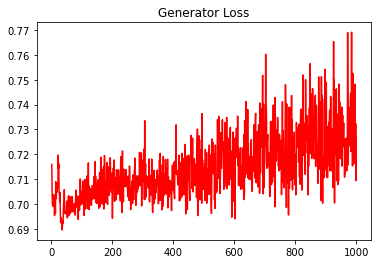

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.5889509328468703


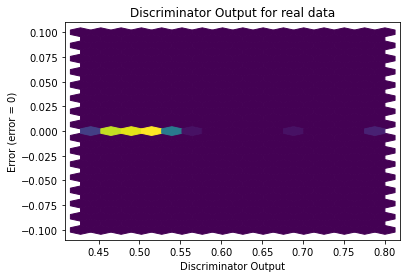

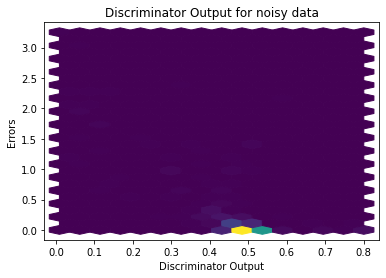

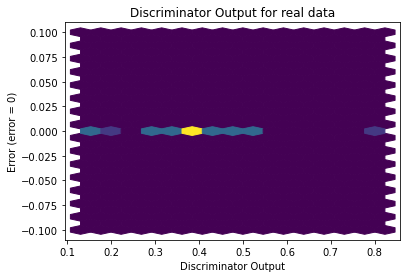

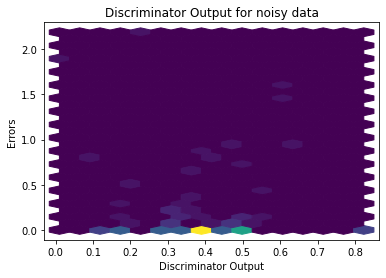

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


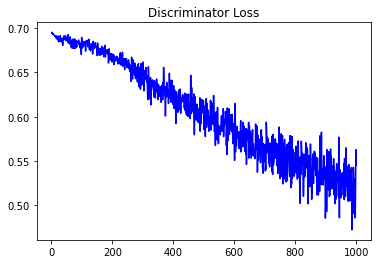

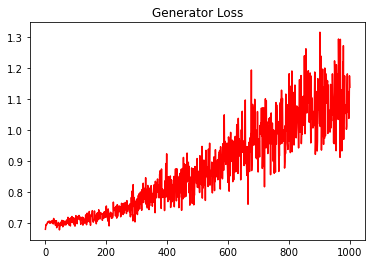

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.8130195328285917


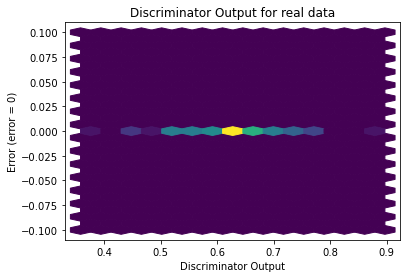

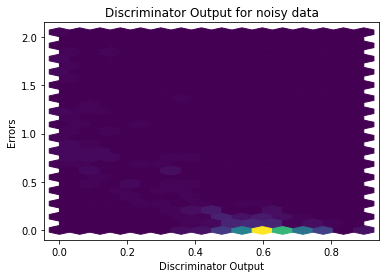

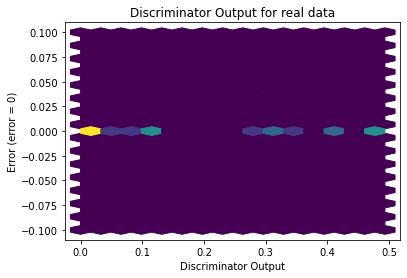

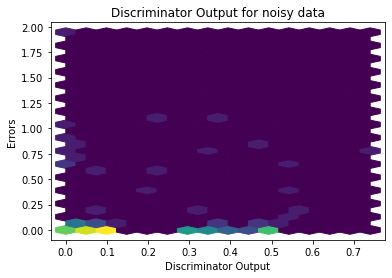

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8159]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6697]], requires_grad=True)
